In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
df = pd.read_csv('../data/1_predicted_category_documents.csv')

if "PY" not in df.columns:
    import django, sys, os
    sys.path.append('/home/max/software/django-tmv/tmv_mcc-apsis/BasicBrowser')
    os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
    django.setup()

    from scoping.models import *

    pydf = df.sort_values('id')
    pys = Doc.objects.filter(id__in=pydf['id']).order_by('PY').values_list('PY',flat=True)
    pydf['PY'] = pys
    df = pydf.sort_index()
    
    df.to_csv('../data/1_predicted_category_documents.csv', index=False)

print(df.shape)
df = df.merge(pd.read_csv('../data/1_document_relevance.csv'))
df.head()

(95916, 296)


,Unnamed: 0,id,content,title,wosarticle__de,wosarticle__wc,ar5,seen,relevant,random_sample,...,2 - 2.4. Sensitivity - upper_pred,2 - 2.5. Detection of a regional climate trend (no attribution) - mean_prediction,2 - 2.5. Detection of a regional climate trend (no attribution) - std_prediction,2 - 2.5. Detection of a regional climate trend (no attribution) - lower_pred,2 - 2.5. Detection of a regional climate trend (no attribution) - upper_pred,PY,0 - relevance - mean_prediction,0 - relevance - std_prediction,0 - relevance - lower_pred,0 - relevance - upper_pred
0,0,13201,It is still difficult to confirm from availabl...,An Overview of Extreme Hot Weather Incidents a...,heatwave; extreme hot weather; natural ventila...,['Construction & Building Technology; Energy &...,NaN,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1992.0,0.478993,0.042110,0.436883,0.521102
1,1,667001,Low-centered ice wedge polygons in the Big Lak...,Field observations of syngenetic ice wedge pol...,syngenetic ice wedge; ice-wedge growth; ice-we...,"['Geosciences, Multidisciplinary']",NaN,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,2012.0,0.693710,0.039792,0.653918,0.733502
2,2,780990,Shallow marine ecosystems naturally experience...,Reef calcifiers are adapted to episodic heat s...,NaN,['Multidisciplinary Sciences'],NaN,0.0,0.0,0,...,1.0,0.0,0.0,0.0,0.0,2013.0,0.712123,0.041321,0.670802,0.753444
3,3,1544528,Trichocomaceae family encompasses the greatest...,DIVERSITY OF ISOLATED Trichocomaceae FROM SOIL...,Trichocomaceae; Pinus elliottii; Corymbia citr...,['Plant Sciences; Forestry'],NaN,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,2017.0,0.622783,0.047144,0.575639,0.669928
4,4,1291826,Climate research in Portugal is often constrai...,High-Resolution Temperature Datasets in Portug...,Climatology; Temperature; Interpolation scheme...,['Meteorology & Atmospheric Sciences'],NaN,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,2014.0,0.549283,0.034545,0.514738,0.583827


In [4]:
[x for x in df.columns if "relev" in x]

['relevant',
 '0 - relevance - mean_prediction',
 '0 - relevance - std_prediction',
 '0 - relevance - lower_pred',
 '0 - relevance - upper_pred']

Text(0, 0.5, 'Number of documents')

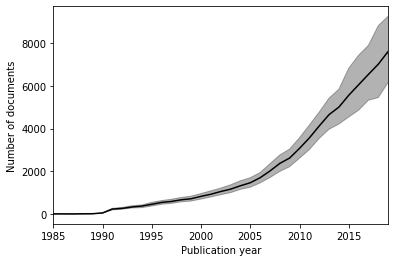

In [29]:
fig, ax = plt.subplots()

lb = df[df['0 - relevance - lower_pred']>0.5].groupby('PY')['id'].size().to_frame().reset_index().rename(columns={"id":"lb"})
mid = df[df['0 - relevance - mean_prediction']>0.5].groupby('PY')['id'].size().to_frame().reset_index()
ub = df[df['0 - relevance - upper_pred']>0.5].groupby('PY')['id'].size().to_frame().reset_index().rename(columns={"id":"ub"})

bounds = lb.merge(ub, how="outer")

ax.plot(mid['PY'], mid['id'], color="black")

ax.fill_between(
    bounds['PY'], bounds['lb'], bounds['ub'],
    color="black",
    alpha=0.3
)

ax.set_xlim([1985,2019])

ax.set_xlabel('Publication year')
ax.set_ylabel('Number of documents')

(1985.0, 2022.0)

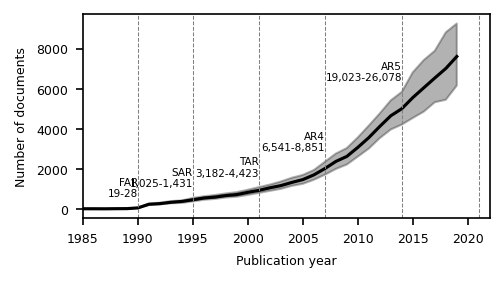

In [45]:
fig, ax = plt.subplots(dpi=150, figsize=(3.5,1.8))

lb = df[df['0 - relevance - lower_pred']>0.5].groupby('PY')['id'].size().to_frame().reset_index().rename(columns={"id":"lb"})
mid = df[df['0 - relevance - mean_prediction']>0.5].groupby('PY')['id'].size().to_frame().reset_index()
ub = df[df['0 - relevance - upper_pred']>0.5].groupby('PY')['id'].size().to_frame().reset_index().rename(columns={"id":"ub"})

mid = mid[mid['PY']<2020]

bounds = lb.merge(ub, how="outer")

bounds = bounds[bounds['PY']<2020]

ax.plot(mid['PY'], mid['id'], color="black")

ax.fill_between(
    bounds['PY'], bounds['lb'], bounds['ub'],
    color="black",
    alpha=0.3
)

ax.set_xlim([1985,2019])

ax.set_xlabel('Publication year', fontsize=6)
ax.set_ylabel('Number of documents', fontsize=6)

ax.tick_params(axis='both', labelsize=6) 

report_dates = [1990, 1995, 2001, 2007, 2014, 2021]
report_labels = ["FAR", "SAR", "TAR", "AR4", "AR5", "AR6"]

ymax = ub['ub'].max()

ld = 0

for d, l in zip(report_dates, report_labels):
    #idx = py_range.index(d)
    
    # bounds for this reporting period
    r_lb = lb[lb['PY'].isin(range(ld,d))]['lb'].sum()
    r_ub = ub[ub['PY'].isin(range(ld,d))]['ub'].sum()
    

    
    if l=="AR6":
        y = ub[ub['PY']==d].ub.values[0]
        ty = y+ymax*0.05 + (1-y/ymax)*0.1
        ax.axvline(d, color="grey",lw=0.5, ls="--")
        ax.text(d, ty, f"{l}\n{r_lb:,}-{r_ub:,}", va="bottom", ha="right", fontsize=5)
    else:
        y = ub[ub['PY']==d].ub.values[0]
        ty = y+ymax*0.05 + (1-y/ymax)*0.1
        ax.axvline(d, color="grey",lw=0.5, ls="--")
        ax.text(d, ty, f"{l}\n{r_lb:,}-{r_ub:,}", va="bottom", ha="right", fontsize=5)

    ld=d

ax.set_xlim([1985,2022])
#ax.plot(lb['PY'],lb['id'])
#ax.plot(ub['PY'],ub['id'])

In [17]:
ub[ub['PY']==d].ub.values[0]

52

Text(0, 0.5, 'Number of documents')

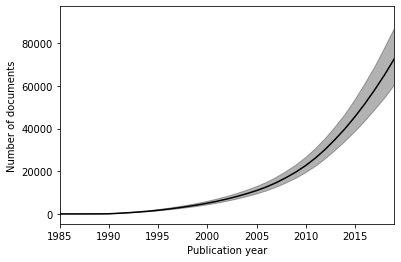

In [8]:
fig, ax = plt.subplots()

lb = df[df['0 - relevance - lower_pred']>0.5].groupby('PY')['id'].size().to_frame().reset_index().rename(columns={"id":"lb"})
mid = df[df['0 - relevance - mean_prediction']>0.5].groupby('PY')['id'].size().to_frame().reset_index()
ub = df[df['0 - relevance - upper_pred']>0.5].groupby('PY')['id'].size().to_frame().reset_index().rename(columns={"id":"ub"})

bounds = lb.merge(ub, how="outer")

ax.plot(mid['PY'], mid['id'].cumsum(), color="black")

ax.fill_between(
    bounds['PY'], bounds['lb'].cumsum(), bounds['ub'].cumsum(),
    color="black",
    alpha=0.3
)

ax.set_xlim([1985,2019])

ax.set_xlabel('Publication year')
ax.set_ylabel('Number of documents')



#ax.plot(lb['PY'],lb['id'])
#ax.plot(ub['PY'],ub['id'])

In [62]:
lb = df[df['0 - relevance - lower_pred']>0.5].shape[0]
mid = df[df['0 - relevance - mean_prediction']>0.5].shape[0]
ub = df[df['0 - relevance - upper_pred']>0.5].shape[0]

print(lb, mid, ub)

64982 78488 93604


In [69]:
pred_cats = [c for c  in df.columns if "12 - " in c and " - mean_prediction" in c]
for c in pred_cats:
    print(df[c].sum())
    label = c.replace(" - mean_prediction",'')
    df.loc[df[label]==1,c] = 1
    print(df[c].sum())
print(pred_cats)

pred_cats = [
    "12 - Terrestrial ES - mean_prediction",
    "12 - Coastal and marine Ecosystems - mean_prediction",
    "12 - Mountains, snow and ice - mean_prediction",
    "12 - Rivers, lakes, and soil moisture - mean_prediction",
    "12 - Human and managed - mean_prediction"
    
]

12615.299999999997
12615.299999999997
9360.599999999999
9360.599999999999
4715.700000000001
4715.700000000001
12003.900000000003
12003.900000000003
30213.3
30213.3
['12 - Coastal and marine Ecosystems - mean_prediction', '12 - Human and managed - mean_prediction', '12 - Mountains, snow and ice - mean_prediction', '12 - Rivers, lakes, and soil moisture - mean_prediction', '12 - Terrestrial ES - mean_prediction']


[Text(0, 0, 'Terrestrial ES'),
 Text(0, 0, 'Coastal and marine ES'),
 Text(0, 0, 'Mountains, snow and ice'),
 Text(0, 0, 'Rivers, lakes\n and soil moisture'),
 Text(0, 0, 'Human and managed')]

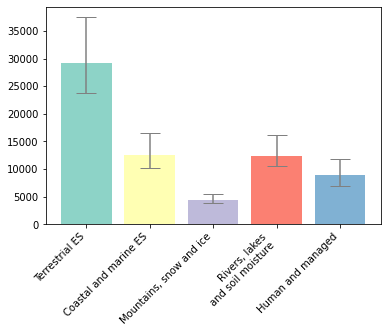

In [71]:
fig, ax = plt.subplots()
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3']

xticks = []
for i, c in enumerate(pred_cats):
    mid = df[
        (df['0 - relevance - mean_prediction']>0.5) & 
        (df[c])>0.5
    ].shape[0]
    ub = df[
        (df['0 - relevance - upper_pred']>0.5) & 
        (df[c.replace('mean_prediction','upper_pred')])>0.5
    ].shape[0]
    lb = df[
        (df['0 - relevance - lower_pred']>0.5) & 
        (df[c.replace('mean_prediction','lower_pred')])>0.5
    ].shape[0]
    ax.bar(i, mid,color=colors[i])
    
    eay = np.array([[ub-mid,mid-lb]]).T
    
    ax.errorbar(i, mid, yerr=eay, color="grey", capsize=10)
    
    xticks.append(c.split("-")[1].strip())
    
ax.set_xticks(range(i+1))

xticks = [
    "Terrestrial ES",
    "Coastal and marine ES",
    "Mountains, snow and ice",
    "Rivers, lakes\n and soil moisture",
    "Human and managed",    
]
ax.set_xticklabels(xticks, rotation=45,ha="right")
    

In [94]:
attrib_cats = [c for c  in df.columns if "2 - " in c and " - mean_prediction" in c and not "12 - " in c]
for c in attrib_cats:
    print(df[c].sum())
    label = c.replace(" - mean_prediction",'')
    df.loc[df[label]==1,c] = 1
    print(df[c].sum())
attrib_cats

41474.9
41911.9
33257.9
33577.9
4545.099999999999
4642.099999999999


['2 - Trend or climate change attribution - mean_prediction',
 '2 - 2.4. Sensitivity - mean_prediction',
 '2 - 2.5. Detection of a regional climate trend (no attribution) - mean_prediction']

[Text(0, 0, 'Trend attribution'),
 Text(0, 0, 'Sensitivity'),
 Text(0, 0, 'Detection')]

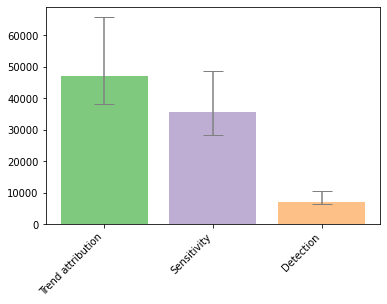

In [95]:
fig, ax = plt.subplots()
colors = ['#7fc97f','#beaed4','#fdc086']

xticks = []
for i, c in enumerate(attrib_cats):
    mid = df[
        (df['0 - relevance - mean_prediction']>0.5) & 
        (df[c])>0.5
    ].shape[0]
    ub = df[
        (df['0 - relevance - upper_pred']>0.5) & 
        (df[c.replace('mean_prediction','upper_pred')])>0.5
    ].shape[0]
    lb = df[
        (df['0 - relevance - lower_pred']>0.5) & 
        (df[c.replace('mean_prediction','lower_pred')])>0.5
    ].shape[0]
    ax.bar(i, mid,color=colors[i])
    
    eay = np.array([[ub-mid,mid-lb]]).T
    
    ax.errorbar(i, mid, yerr=eay, color="grey", capsize=10)
    
    xticks.append(c.split("-")[1].strip())
    
ax.set_xticks(range(i+1))

xticks = [
    "Trend attribution",
    "Sensitivity",
    "Detection"
]
ax.set_xticklabels(xticks, rotation=45,ha="right")
    

In [106]:
doc_continents = pd.read_csv('../data/doc_continents.csv').merge(pd.read_csv('../data/1_document_relevance.csv'), left_on="doc_id",right_on="id")
doc_continents.head()

,doc_id,continent,id,0 - relevance - mean_prediction,0 - relevance - std_prediction,0 - relevance - lower_pred,0 - relevance - upper_pred
0,1340101,NaN,1340101,0.520528,0.066496,0.454032,0.587024
1,222401,North America,222401,0.668736,0.067381,0.601355,0.736117
2,3307272,North America,3307272,0.647987,0.046520,0.601466,0.694507
3,355004,North America,355004,0.583459,0.060201,0.523258,0.643659
4,4603,North America,4603,0.547725,0.051915,0.495810,0.599640


In [107]:
doc_continents.continent.unique()

array([nan, 'North America', 'South America', 'Europe', 'Oceania', 'Asia',
       'Africa'], dtype=object)

[Text(0, 0, 'North America'),
 Text(0, 0, 'South America'),
 Text(0, 0, 'Europe'),
 Text(0, 0, 'Africa'),
 Text(0, 0, 'Asia'),
 Text(0, 0, 'Oceania')]

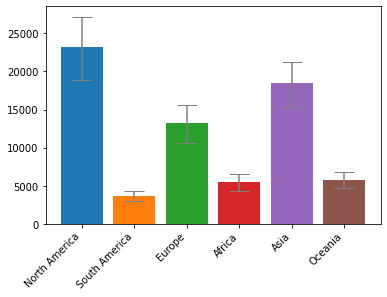

In [120]:
fig, ax = plt.subplots()
cons = ["North America", "South America", "Europe","Africa", "Asia", "Oceania"]

for i, con in enumerate(cons):
    cdf = df[df['id'].isin(doc_continents.loc[doc_continents['continent']==con,"doc_id"])]
    mid = cdf[cdf['0 - relevance - mean_prediction']>0.5].shape[0]
    ub = cdf[cdf['0 - relevance - upper_pred']>0.5].shape[0]
    lb = cdf[cdf['0 - relevance - lower_pred']>0.5].shape[0]
    
    ax.bar(i, mid)
    eay = np.array([[ub-mid,mid-lb]]).T
    
    ax.errorbar(i, mid, yerr=eay, color="grey", capsize=10)
    
ax.set_xticks(range(i+1))
ax.set_xticklabels(cons, rotation=45,ha="right")
    

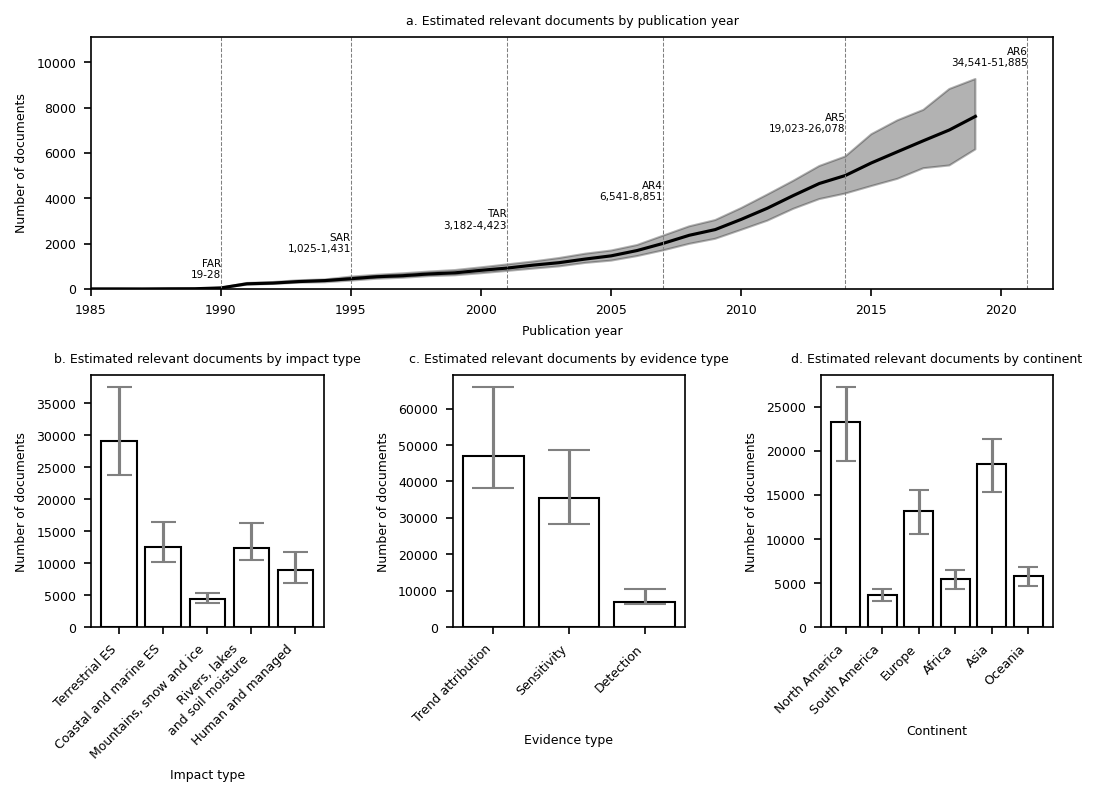

In [134]:
fig = plt.figure(figsize=(7.2,5.2), dpi=150, constrained_layout=True)
gs = fig.add_gridspec(6, 6)

#########################
## Time+uncertainty
ax = plt.subplot(gs[:3,0:])


lb = df[df['0 - relevance - lower_pred']>0.5].groupby('PY')['id'].size().to_frame().reset_index().rename(columns={"id":"lb"})
mid = df[df['0 - relevance - mean_prediction']>0.5].groupby('PY')['id'].size().to_frame().reset_index()
ub = df[df['0 - relevance - upper_pred']>0.5].groupby('PY')['id'].size().to_frame().reset_index().rename(columns={"id":"ub"})

mid = mid[mid['PY']<2020]

bounds = lb.merge(ub, how="outer")

bounds = bounds[bounds['PY']<2020]

ax.plot(mid['PY'], mid['id'], color="black")

ax.fill_between(
    bounds['PY'], bounds['lb'], bounds['ub'],
    color="black",
    alpha=0.3
)

ax.set_xlim([1985,2019])

ax.set_xlabel('Publication year', fontsize=6)
ax.set_ylabel('Number of documents', fontsize=6)

ax.tick_params(axis='both', labelsize=6) 

report_dates = [1990, 1995, 2001, 2007, 2014, 2021]
report_labels = ["FAR", "SAR", "TAR", "AR4", "AR5", "AR6"]

ymax = ub['ub'].max()

ld = 0

offsets = [350, 1000, 1500, 1500, 1000, 500]

for i, (d, l) in enumerate(zip(report_dates, report_labels)):
    #idx = py_range.index(d)
    
    # bounds for this reporting period
    r_lb = lb[lb['PY'].isin(range(ld,d))]['lb'].sum()
    r_ub = ub[ub['PY'].isin(range(ld,d))]['ub'].sum()
    

    
    if l=="AR6":
        y = ub.ub.max()
        ty = y+offsets[i]
        ax.axvline(d, color="grey",lw=0.5, ls="--")
        ax.text(d, ty, f"{l}\n{r_lb:,}-{r_ub:,}", va="bottom", ha="right", fontsize=5)
    else:
        y = ub[ub['PY']==d].ub.values[0]
        ty = y+offsets[i]
        ax.axvline(d, color="grey",lw=0.5, ls="--")
        ax.text(d, ty, f"{l}\n{r_lb:,}-{r_ub:,}", va="bottom", ha="right", fontsize=5)

    ld=d

ax.set_xlim([1985,2022])
ax.set_ylim([0,ymax*1.2])
ax.set_title("a. Estimated relevant documents by publication year", fontsize=6)
    
    
####################
## 

#ax = plt.subplot(gs[:3,3:])




######################################
##

ax = plt.subplot(gs[3:,:2])

colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3']

xticks = []
for i, c in enumerate(pred_cats):
    mid = df[
        (df['0 - relevance - mean_prediction']>0.5) & 
        (df[c])>0.5
    ].shape[0]
    ub = df[
        (df['0 - relevance - upper_pred']>0.5) & 
        (df[c.replace('mean_prediction','upper_pred')])>0.5
    ].shape[0]
    lb = df[
        (df['0 - relevance - lower_pred']>0.5) & 
        (df[c.replace('mean_prediction','lower_pred')])>0.5
    ].shape[0]
    
    #ax.bar(i, mid,color=colors[i])
    ax.bar(i, mid, color="None",edgecolor="black")
    
    eay = np.array([[ub-mid,mid-lb]]).T
    
    ax.errorbar(i, mid, yerr=eay, color="grey", capsize=6)
    
    xticks.append(c.split("-")[1].strip())
    
ax.set_xticks(range(i+1))
ax.tick_params(axis='both', labelsize=6) 

xticks = [
    "Terrestrial ES",
    "Coastal and marine ES",
    "Mountains, snow and ice",
    "Rivers, lakes\n and soil moisture",
    "Human and managed",    
]
ax.set_xticklabels(xticks, rotation=45,ha="right")
ax.set_title("b. Estimated relevant documents by impact type", fontsize=6)
ax.set_xlabel('Impact type', fontsize=6)
ax.set_ylabel('Number of documents', fontsize=6)


######################################
##

ax = plt.subplot(gs[3:,2:4])


xticks = []
for i, c in enumerate(attrib_cats):
    mid = df[
        (df['0 - relevance - mean_prediction']>0.5) & 
        (df[c])>0.5
    ].shape[0]
    ub = df[
        (df['0 - relevance - upper_pred']>0.5) & 
        (df[c.replace('mean_prediction','upper_pred')])>0.5
    ].shape[0]
    lb = df[
        (df['0 - relevance - lower_pred']>0.5) & 
        (df[c.replace('mean_prediction','lower_pred')])>0.5
    ].shape[0]
    
    #ax.bar(i, mid,color=colors[i])
    ax.bar(i, mid, color="None",edgecolor="black")
    
    eay = np.array([[ub-mid,mid-lb]]).T
    
    ax.errorbar(i, mid, yerr=eay, color="grey", capsize=10)
    
    
ax.set_xticks(range(i+1))
ax.tick_params(axis='both', labelsize=6) 

xticks = [
    "Trend attribution",
    "Sensitivity",
    "Detection"
]

ax.set_xticklabels(xticks, rotation=45,ha="right")
ax.set_title("c. Estimated relevant documents by evidence type", fontsize=6)

ax.set_xlabel('Evidence type', fontsize=6)
ax.set_ylabel('Number of documents', fontsize=6)

######################################
##

ax = plt.subplot(gs[3:,4:6])

cons = ["North America", "South America", "Europe","Africa", "Asia", "Oceania"]

for i, con in enumerate(cons):
    cdf = df[df['id'].isin(doc_continents.loc[doc_continents['continent']==con,"doc_id"])]
    mid = cdf[cdf['0 - relevance - mean_prediction']>0.5].shape[0]
    ub = cdf[cdf['0 - relevance - upper_pred']>0.5].shape[0]
    lb = cdf[cdf['0 - relevance - lower_pred']>0.5].shape[0]
    
    #ax.bar(i, mid)
    ax.bar(i, mid, color="None",edgecolor="black")
    
    eay = np.array([[ub-mid,mid-lb]]).T
    
    ax.errorbar(i, mid, yerr=eay, color="grey", capsize=5)
    
ax.set_xticks(range(i+1))
ax.set_xticklabels(cons, rotation=45,ha="right")
ax.tick_params(axis='both', labelsize=6) 
ax.set_title("d. Estimated relevant documents by continent", fontsize=6)

ax.set_xlabel('Continent', fontsize=6)
ax.set_ylabel('Number of documents', fontsize=6)

plt.savefig(f"../figures/figure_1.png", dpi=500, bbox_inches="tight")
plt.savefig(f"../figures/figure_1.svg")
plt.savefig(f"../figures/figure_1.pdf", bbox_inches="tight")

In [28]:
np.array([[ub.shape[0],lb.shape[0]]]).T.shape

(2, 1)